### Problem Statemnt :
    
  we will use Titanic dataset from Kaggle. Using variables like gender, age, class of ticket and few other variables with a logistic regression model, we predict if they **survived or not** by checking our accuracy to predict

### Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the Datasets

We shall work with the train.csv file which is extracted from the Kaggle website named as titanic. The dataset contains the following features:
    
  - PassengerId - Id of the passenger
    
  - survival - Survival 0 = No, 1 = Yes

  - pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

  - survival - Survival 0 = No, 1 = Yes

  - pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

  - Name - Name of the Passenger
  
  - sex - Sex
  
  - Age - Age in years
  
  - sibsp - # of siblings / spouses aboard the Titanic

  - parch - # of parents / children aboard the Titanic
  
  -  ticket - Ticket number
  
  - fare - Passenger fare
    
  - cabin - Cabin number
  
  - embarked - Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Drwaing insights from the data

Summary of the dataset gives us an clear idea of the dataset about mean, median, standard deviation

In [3]:
titanic_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Insights:

  - There are total of 891 observations in the train data.
  
  - Some of the columns contains null values mainly age and embarked and cabin

### Dealing with the missing values

In [4]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As there are large number of missing values in the dataset, we should not drop the outliers. We should replace them with other alternative ways such as Mean, median or by means of any other imputation

First, we shall take the feature **Age**

#### Age - Missing Values

In [5]:
print('Percent of missing "Age" records is %.2f%%' %((titanic_train['Age'].isnull().sum()/titanic_train.shape[0])*100))

Percent of missing "Age" records is 19.87%


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

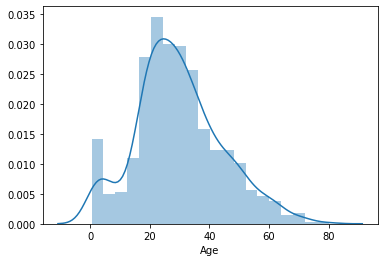

In [6]:
sns.distplot(titanic_train.Age)

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values

In [7]:
#copying the entire data into a new dataframe
train_data = titanic_train.copy()

#Replacing the null values in the new dataset with the median of the original dataset
train_data['Age'].fillna(titanic_train['Age'].median(skipna = True), inplace = True)

#### Cabin - Missing Values

In [8]:
print('Percent of missing "Cabin" records is %.2f%%' %((titanic_train['Cabin'].isnull().sum()/titanic_train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable by dropping that feature in our model.

In [9]:
train_data.drop('Cabin', axis = 1, inplace=True)

#### Embarked - Missing Values

In [10]:
print('Percent of missing "Embarked" records is %.2f%%' %((titanic_train['Embarked'].isnull().sum()/titanic_train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded which is also known as mode

S    644
C    168
Q     77
Name: Embarked, dtype: int64


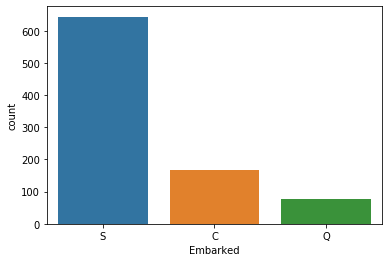

In [11]:
print(titanic_train['Embarked'].value_counts())
sns.countplot(titanic_train['Embarked'])

Here S indicates **Southampton**, C indicates **Cherbourg** and Q indicates **Queenstown**

So, From the above plot, we can see that most passengers boarded at Southampton. So we need to fill the two missing values by S

In [12]:
train_data['Embarked'].fillna(titanic_train['Embarked'].value_counts().idxmax(), inplace=True)

In [13]:
#Checking the missing values in the adjusted train data
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


According to our knowledge, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [15]:
#Creating an extra categorical variable for Travelling alone instead of SibSp and Parch and dropping the SibSp and Parch columns
train_data['Travelling Alone'] = np.where(train_data['SibSp'] + train_data['Parch'] > 0, 0, 1)
train_data.drop('SibSp', axis = 1, inplace = True)
train_data.drop('Parch', axis = 1, inplace = True)

#### Creating dummy variables for categorical variables

In [16]:
#We are creating a dummy variables for the below columns as they are ordinal data and they have only less unique values(less than 10)
training = pd.get_dummies(train_data, columns = ['Pclass', 'Embarked', 'Sex'])

#Removing the unwanted columns
training.drop('PassengerId', axis = 1, inplace = True)
training.drop('Ticket', axis = 1, inplace = True)
training.drop('Name', axis = 1, inplace = True)

#Dropping the sex_female feature as if the value of Sex_male is 0, then obviously the gender would be female
training.drop('Sex_female', axis = 1, inplace = True)

final_training_data = training
final_training_data.head()

,Survived,Age,Fare,Travelling Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


#### Now applying the same changes to the test data set

- I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = median).
- I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis.
- There were no missing values in the "Embarked" port variable.
- I'll add the dummy variables to finalize the test set.
- Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45 as there is a missing value in the dataset

## Exploratory Data Analysis

Let's explore the data carefully by visualization of the plots with all the features vs Survived

### Exploration of Age

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

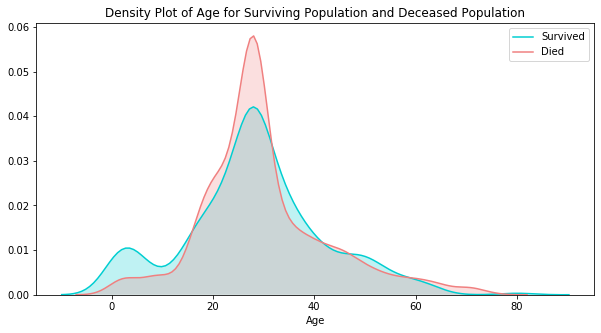

In [17]:
#Setting the figure size
plt.figure(figsize=(10,5))

#Plotting a KDE plot for Age vs Survived
ax = sns.kdeplot(final_training_data["Age"][final_training_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_training_data["Age"][final_training_data.Survived == 0], color="lightcoral", shade=True)

#Legend for the two plots of survived or not survived
plt.legend(['Survived', 'Died'])

#Title
plt.title('Density Plot of Age for Surviving Population and Deceased Population')

#Naming the x-axis
ax.set(xlabel='Age')
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

### Exploration of Fare

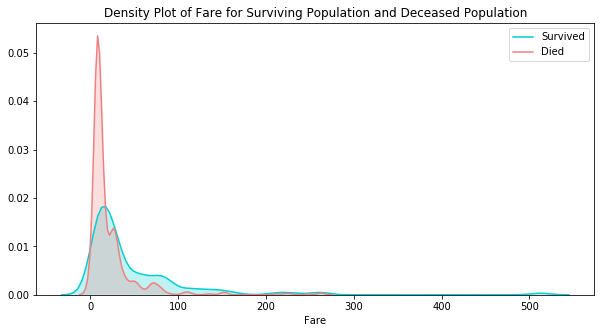

In [18]:
#Setting the figure size
plt.figure(figsize=(10,5))

#Plotting a KDE plot for Fare vs Survived
ax = sns.kdeplot(final_training_data["Fare"][final_training_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_training_data["Fare"][final_training_data.Survived == 0], color="lightcoral", shade=True)

#Legend for the two plots of survived or not survived
plt.legend(['Survived', 'Died'])

#Title
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')

#Naming the x-axis
ax.set(xlabel='Fare')
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive as their cabins are below and will not be clean and tidy. This will be probably strongly correlated with Passenger Class, which we'll look at next.

### Exploration of Pclass(Passenger Class)

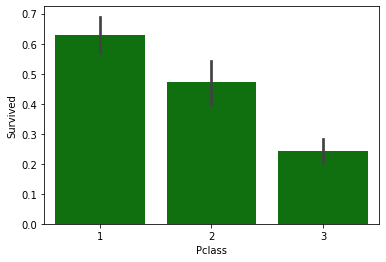

In [19]:
sns.barplot('Pclass', 'Survived', data=train_data, color="green")
plt.show()

Unsurprisingly, being a first class passenger was safest means first class passenger has a lot of facilities and importance in saving their lives when compared to other class passengers

### Exploration of Embarked

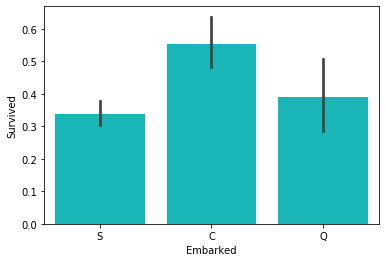

In [20]:
sns.barplot('Embarked', 'Survived', data=train_data, color="darkturquoise")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).

### Exploration of Sex

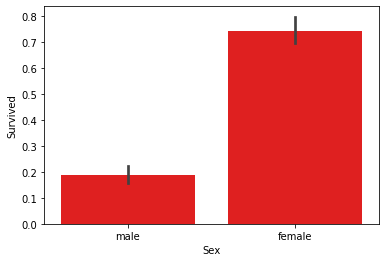

In [21]:
sns.barplot('Sex', 'Survived', data=train_data, color="red")
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

### Exploration of Travelling Alone

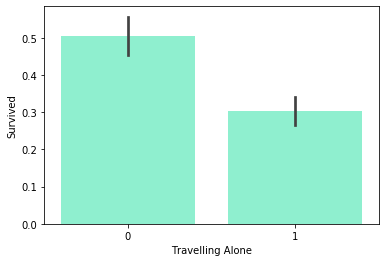

In [22]:
sns.barplot('Travelling Alone', 'Survived', data=train_data, color="aquamarine")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

### Plotting a heatmap to find the correlation between features

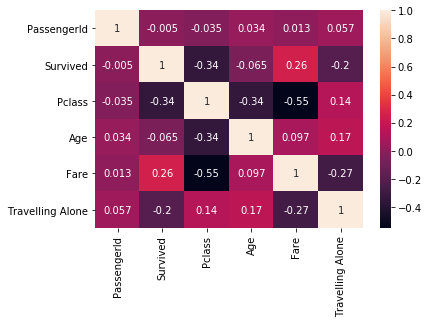

In [23]:
sns.heatmap(train_data.corr(), annot=True)

From the above heatmap, we can see that there is a strong relationship between Fare and survived, as the treatment level will obviously be based on the fare which leads to be most important in their survival who has purchased the ticket with high fare.

## Logistic Regression

### Feature Selection

#### Recursive Feature elimination(RFE)

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [24]:
#Importing the required libraries and packages
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Declaring the predictor variables and target variable
x = final_training_data.drop('Survived', axis = 1)
y = final_training_data['Survived']

#Building a Logistic Regression model
model = LogisticRegression()

#Creating a RFE model and selecting the attributes
rfe = RFE(model, 10) #10 indicates the number of attributes we have considered for building this model
rfe = rfe.fit(x, y)

#printing the selected features
print('The selected features are : %s' %list(x.columns[rfe.support_]))

The selected features are : ['Age', 'Fare', 'Travelling Alone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male']


#### Feature Ranking with RFE and Cross Validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 9
Selected features: ['Age', 'Travelling Alone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male']


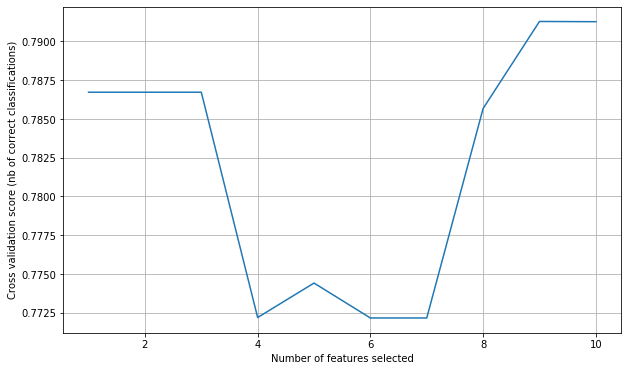

In [25]:
#Importing the required library and package
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=12, scoring='accuracy') #cv indicates the cross validation splitting strategy
rfecv.fit(x, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.show()

We can see that 9 features are considered the best for the fit

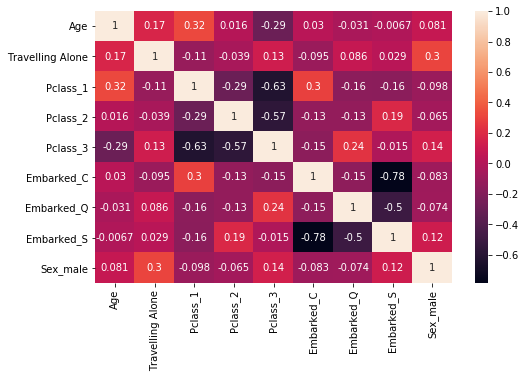

In [26]:
#Considering the best optimal features we got
selected_features = ['Age', 'Travelling Alone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 
                     'Embarked_S', 'Sex_male']

#Now considering all the optimal features we obtained as predictor variables and plotting a heatmap to know relationship b/w them.
x = final_training_data[selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(x.corr(), annot=True)
plt.show()

### Model Evaluation with the Optimal Features using normal train/test split

Train/Test split results:
LogisticRegression accuracy is 0.787
LogisticRegression log_loss is 0.489
LogisticRegression auc is 0.831


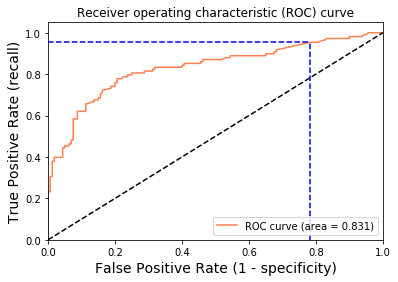

Using a threshold of 0.071 guarantees a sensitivity of 0.954 and a specificity of 0.219, i.e. a false positive rate of 78.12%.


In [27]:
# Importing the required packages and libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, log_loss, auc

#Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

#Checking the scores of the logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#Predicting the values
y_predict = logreg.predict(x_test)

#Probable predcited values
y_predict_prob = logreg.predict_proba(x_test)[:,1]

[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_predict))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_predict_prob))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

From the above observations, we can see that we got an accuracy of **78.7%**

### Model Evaluation with the Optimal Features using K fold cross validation

In [28]:
#Importing the required library
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation logistic regression
logreg = LogisticRegression()

# Use cross_val_score function
# We are passing the entirety of x and y, not x_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many

scores_accuracy = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, x, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, x, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.798
LogisticRegression average log_loss is 0.455
LogisticRegression average auc is 0.847


Even when we done the model evaluation using k fold cross validation technique, our accuracy has not much improved and is nearly equal to **80%**